In [232]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import csv
import pandas as pd

import datasets

In [233]:
data_background = pd.read_csv("calibration_and_background/background_spectrum.csv")
data_x1 = pd.read_csv("spectrum_x/spectrum_doos_x_1.csv")
data_x2 = pd.read_csv("spectrum_x/spectrum_doos_x_2.csv")
data_x3 = pd.read_csv("spectrum_x/spectrum_doos_x_3.csv")
data_x4 = pd.read_csv("spectrum_x/spectrum_doos_x_4.csv")
data_x5 = pd.read_csv("spectrum_x/spectrum_doos_x_5.csv")
data_source = pd.read_csv("calibration_and_background/spectrum_cali.csv")

function to add counts from channel A and B

In [234]:
def add_counts(dataset_1, dataset_2):
    total_counts = []
    
    for i, j in zip(dataset_1, dataset_2):
        total_counts.append(i + j)
        
    return total_counts
        

function to focus spectrum on peak energy

In [235]:
def adjust(dataset_1, dataset_2):
    x_data = []
    y_data = []
    
    for i, j in zip(dataset_1, dataset_2):
        if i > 150 and i < 300:
            x_data.append(i)
            y_data.append(j)
            
    return x_data, y_data

def adjust_energy(dataset_1, dataset_2):
    x_data = []
    y_data = []
    
    for i, j in zip(dataset_1, dataset_2):
        if i > 500 and i < 520:
            x_data.append(i)
            y_data.append(j)
            
    return x_data, y_data

calibration

In [236]:
def energy_A(dataset):
    data = []
    a = 18.33165153044063
    b = -200.70803901782693
    for p in dataset:
        E = a * p + b
        data.append(E)
        
    return data

def energy_B(dataset):
    data = []
    a = -51.330350835884154
    b = 1481.40028255239
    for p in dataset:
        E = a * p + b
        data.append(E)
        
    return data

split datasets into lists

In [237]:
pulseheights_x1 = data_x1["pulseheight"]
counts_A_x1 = data_x1["counts_ch_A"]
counts_B_x1 = data_x1["counts_ch_B"]
counts_total_x1 = add_counts(counts_A_x1, counts_B_x1)

pulseheights_x2 = data_x2["pulseheight"]
counts_A_x2 = data_x2["counts_ch_A"]
counts_B_x2 = data_x2["counts_ch_B"]
counts_total_x2 = add_counts(counts_A_x1, counts_B_x1)

pulseheights_x3 = data_x3["pulseheight"]
counts_A_x3 = data_x3["counts_ch_A"]
counts_B_x3 = data_x3["counts_ch_B"]
counts_total_x3 = add_counts(counts_A_x3, counts_B_x3)

pulseheights_x4 = data_x4["pulseheight"]
counts_A_x4 = data_x4["counts_ch_A"]
counts_B_x4 = data_x4["counts_ch_B"]
counts_total_x4 = add_counts(counts_A_x4, counts_B_x4)

pulseheights_x5 = data_x5["pulseheight"]
counts_A_x5 = data_x5["counts_ch_A"]
counts_B_x5 = data_x5["counts_ch_B"]
counts_total_x5 = add_counts(counts_A_x5, counts_B_x5)

pulseheights_source = data_source["pulseheight"]
counts_A_source = data_source["counts_ch_A"]
counts_B_source = data_source["counts_ch_B"]
counts_total_source = add_counts(counts_A_source, counts_B_source)

pulseheights_background = data_background["pulseheight"]
counts_background_A = data_background["counts_ch_A"]
counts_background_B = data_background["counts_ch_B"]
counts_tot_background = add_counts(counts_background_A, counts_background_B)


In [238]:

# plt.plot(pulseheights_background, counts_background_A, color ='red', label = 'channel A')
# plt.plot(pulseheights_background, counts_background_B, color = 'blue', label = 'channel B')
# plt.plot(pulseheights_background, counts_tot_background, color = 'green', label = 'channel A and B')
# plt.gca().set_facecolor('lightgrey')
# plt.title("Spectrum without source")
# plt.legend(loc = 'upper right')
# plt.ylabel("counts")
# plt.xlabel("pulseheights (mV)")
# plt.show()

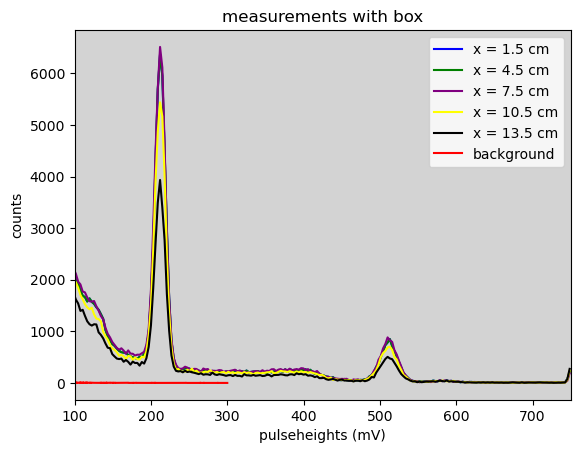

In [239]:
plt.plot(pulseheights_x1, counts_total_x1, color = 'blue', label = "x = 1.5 cm")
plt.plot(pulseheights_x2, counts_total_x2, color = 'green', label = "x = 4.5 cm")
plt.plot(pulseheights_x3, counts_total_x3, color = 'purple', label = "x = 7.5 cm")
plt.plot(pulseheights_x4, counts_total_x4, color = 'yellow', label = "x = 10.5 cm")
plt.plot(pulseheights_x5, counts_total_x5, color = 'black', label = "x = 13.5 cm")
plt.plot(pulseheights_background, counts_tot_background, color = 'red', label = 'background')
plt.gca().set_facecolor('lightgrey')
plt.title("measurements with box")
plt.legend(loc = 'upper right')
plt.xlim(100, 750)
plt.ylabel("counts")
plt.xlabel("pulseheights (mV)")
plt.show()

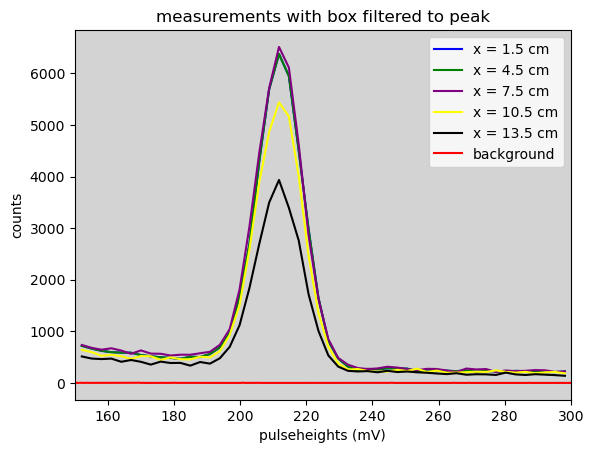

In [240]:
pulseheights_cut_x1, counts_cut_x1 = adjust(pulseheights_x1, counts_total_x1)
pulseheights_cut_x2, counts_cut_x2 = adjust(pulseheights_x2, counts_total_x2)
pulseheights_cut_x3, counts_cut_x3 = adjust(pulseheights_x3, counts_total_x3)
pulseheights_cut_x4, counts_cut_x4 = adjust(pulseheights_x4, counts_total_x4)
pulseheights_cut_x5, counts_cut_x5 = adjust(pulseheights_x5, counts_total_x5)
pulseheights_cut_no_source, counts_cut_no_source = adjust(pulseheights_background, counts_tot_background)

plt.plot(pulseheights_cut_x1, counts_cut_x1, color = 'blue', label = "x = 1.5 cm")
plt.plot(pulseheights_cut_x2, counts_cut_x2, color = 'green', label = "x = 4.5 cm")
plt.plot(pulseheights_cut_x3, counts_cut_x3, color = 'purple', label = "x = 7.5 cm")
plt.plot(pulseheights_cut_x4, counts_cut_x4, color = 'yellow', label = "x = 10.5 cm")
plt.plot(pulseheights_cut_x5, counts_cut_x5, color = 'black', label = "x = 13.5 cm")
plt.plot(pulseheights_cut_no_source, counts_cut_no_source, color = 'red', label = 'background')
plt.gca().set_facecolor('lightgrey')
plt.title("measurements with box filtered to peak")
plt.legend(loc = 'upper right')
plt.xlim(150, 300)
plt.ylabel("counts")
plt.xlabel("pulseheights (mV)")
plt.show()

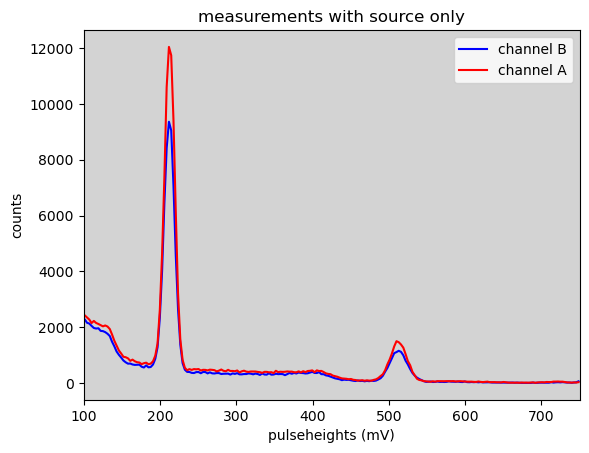

In [241]:
plt.plot(pulseheights_source, counts_B_source, color = 'blue', label = "channel B")
plt.plot(pulseheights_source, counts_A_source, color = 'red', label = 'channel A')
plt.gca().set_facecolor('lightgrey')
plt.title("measurements with source only")
plt.legend(loc = 'upper right')
plt.xlim(100, 750)
plt.ylabel("counts")
plt.xlabel("pulseheights (mV)")
plt.show()

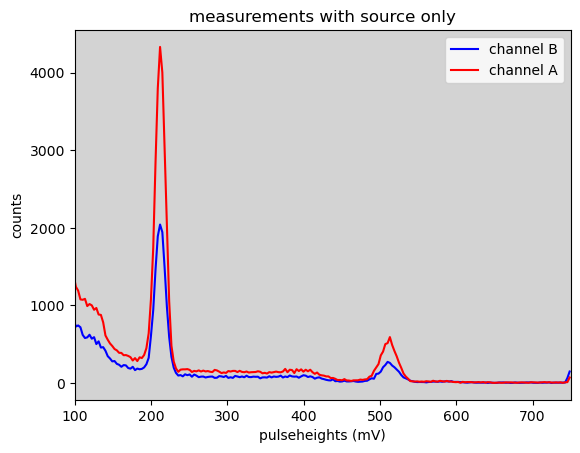

In [242]:
plt.plot(pulseheights_x1, counts_B_x1, color = 'blue', label = "channel B")
plt.plot(pulseheights_x1, counts_A_x1, color = 'red', label = 'channel A')
plt.gca().set_facecolor('lightgrey')
plt.title("measurements with source only")
plt.legend(loc = 'upper right')
plt.xlim(100, 750)
plt.ylabel("counts")
plt.xlabel("pulseheights (mV)")
plt.show()

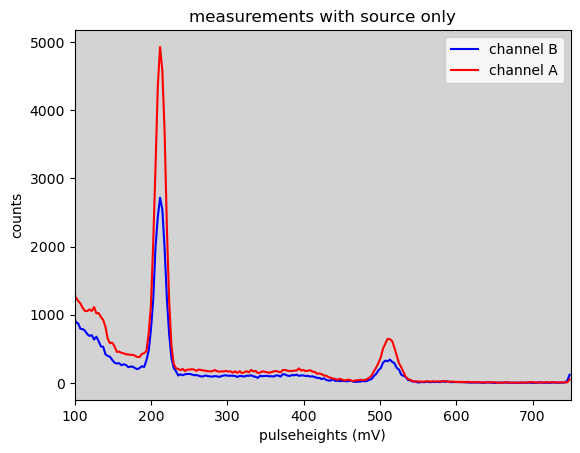

In [243]:
plt.plot(pulseheights_x2, counts_B_x2, color = 'blue', label = "channel B")
plt.plot(pulseheights_x2, counts_A_x2, color = 'red', label = 'channel A')
plt.gca().set_facecolor('lightgrey')
plt.title("measurements with source only")
plt.legend(loc = 'upper right')
plt.xlim(100, 750)
plt.ylabel("counts")
plt.xlabel("pulseheights (mV)")
plt.show()

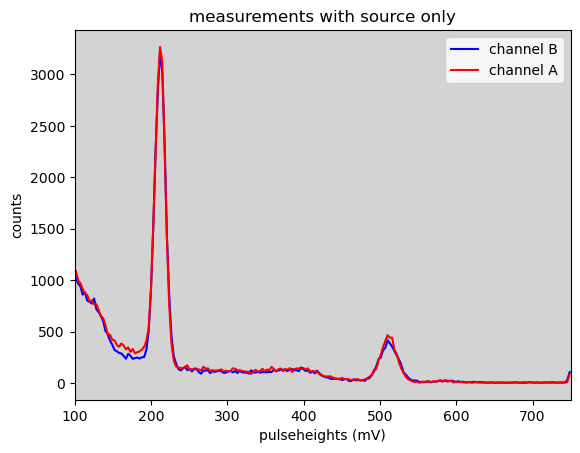

In [244]:
plt.plot(pulseheights_x3, counts_B_x3, color = 'blue', label = "channel B")
plt.plot(pulseheights_x3, counts_A_x3, color = 'red', label = 'channel A')
plt.gca().set_facecolor('lightgrey')
plt.title("measurements with source only")
plt.legend(loc = 'upper right')
plt.xlim(100, 750)
plt.ylabel("counts")
plt.xlabel("pulseheights (mV)")
plt.show()

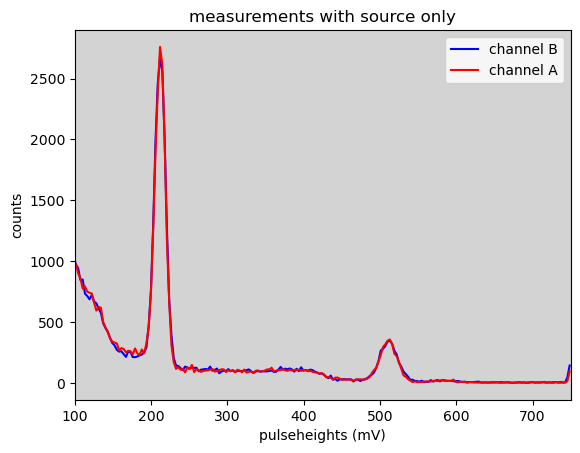

In [245]:
plt.plot(pulseheights_x4, counts_B_x4, color = 'blue', label = "channel B")
plt.plot(pulseheights_x4, counts_A_x4, color = 'red', label = 'channel A')
plt.gca().set_facecolor('lightgrey')
plt.title("measurements with source only")
plt.legend(loc = 'upper right')
plt.xlim(100, 750)
plt.ylabel("counts")
plt.xlabel("pulseheights (mV)")
plt.show()

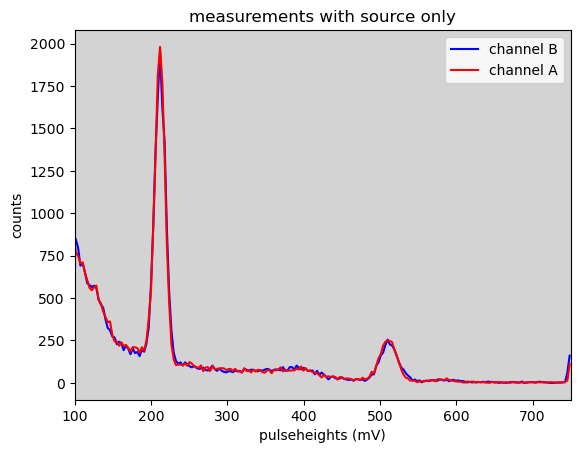

In [246]:
plt.plot(pulseheights_x5, counts_B_x5, color = 'blue', label = "channel B")
plt.plot(pulseheights_x5, counts_A_x5, color = 'red', label = 'channel A')
plt.gca().set_facecolor('lightgrey')
plt.title("measurements with source only")
plt.legend(loc = 'upper right')
plt.xlim(100, 750)
plt.ylabel("counts")
plt.xlabel("pulseheights (mV)")
plt.show()